# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment


<a id='wrangling'></a>
## Data Wrangling

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
 

In [138]:
# load data from given dataset
df=pd.read_csv(r"C:\Users\hazem\Desktop\noshowappointments-kagglev2-may-2016.csv")
# know the shape
df.shape
 

(110527, 14)

In [139]:
#lets see our data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [140]:
#whats the current columns names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [141]:
#fixing some names
df.columns=['patient_id','appointment_id','gender','scheduled_day','appointment_day','age','neighboourhood','scholarship','hypertension','diabetes','alcoholism','handcap','sms_recieved','no_show']
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighboourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_recieved',
       'no_show'],
      dtype='object')

In [142]:
#check after changing 
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighboourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_recieved,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [143]:
#check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighboourhood   110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_recieved     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [144]:
#lets see how many missed there scheduled appointments ---conc(1)
df['no_show'].value_counts()


No     88208
Yes    22319
Name: no_show, dtype: int64

In [145]:
#lets see how many missed there scheduled appointments ---conc(1)
missed=len(df.query('no_show == "Yes"'))
total=df.shape[0]
ratio=int(missed/total*100)
ratio

20

In [146]:
# change patient_id type from float to int as it should--- no missing values
df['patient_id']=df['patient_id'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patient_id       110527 non-null  int64 
 1   appointment_id   110527 non-null  int64 
 2   gender           110527 non-null  object
 3   scheduled_day    110527 non-null  object
 4   appointment_day  110527 non-null  object
 5   age              110527 non-null  int64 
 6   neighboourhood   110527 non-null  object
 7   scholarship      110527 non-null  int64 
 8   hypertension     110527 non-null  int64 
 9   diabetes         110527 non-null  int64 
 10  alcoholism       110527 non-null  int64 
 11  handcap          110527 non-null  int64 
 12  sms_recieved     110527 non-null  int64 
 13  no_show          110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [147]:
#check data again
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighboourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_recieved,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [148]:
# change type of scheduled_day , appointment_day  to datetime to be readable
df['scheduled_day']=pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64')
df['appointment_day']=pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64')

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighboourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_recieved,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

In [149]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_recieved
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [150]:
# check for duplicates as it seems logic to see duplicates which means same patients visiting the hospital
df['patient_id'].duplicated().sum()


48228

In [151]:
# first and last scheduled visit --- conc(2)
first_scheduled =df['scheduled_day'].min()
last_scheduled=df['scheduled_day'].max()

# first and last rescheduled appointment
first_appointment=df['appointment_day'].min()
last_appointment=df['appointment_day'].max()

print('First Scheduled visit: {}'.format(first_scheduled))
print('Last Scheduled visit: {}'.format(last_scheduled))
print('First reScheduled visit: {}'.format(first_appointment))
print('Last reScheduled visit: {}'.format(last_appointment))

First Scheduled visit: 2015-11-10 00:00:00
Last Scheduled visit: 2016-06-08 00:00:00
First reScheduled visit: 2016-04-29 00:00:00
Last reScheduled visit: 2016-06-08 00:00:00


In [152]:
#know the week day of scheduled visit 
df['scheduled_weekday']= df.scheduled_day.dt.day_name()
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighboourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_recieved,no_show,scheduled_weekday
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [153]:
# know the appointmnets distrubtion during the week --- conc(2)
df['scheduled_weekday'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: scheduled_weekday, dtype: int64

In [154]:
# how many days does the patient wait after change the scheduled_day to real appointment_day----- conc(3)
df['rescheduling_duration']=(df.appointment_day - df.scheduled_day).dt.days
df['rescheduling_duration'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: rescheduling_duration, dtype: float64

In [155]:
# how many rescheduled for the same day----- conc(3)
same_day= df[(df.rescheduling_duration== 0)].rescheduling_duration.value_counts()
same_day

0    38563
Name: rescheduling_duration, dtype: int64

In [156]:
# how many rescheduled for the same day and also missed the visit----- conc(3)
missed_same_day=len(df.query('rescheduling_duration== 0 and no_show== "Yes"'))
missed_same_day

1792

In [157]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_recieved,rescheduling_duration
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


- Age: 25% of patients are years old ,50% of patients are 37 years old , 75% of patients are 55 years old ,and the oldest patient is 115 years old

- Rescheduling patients wait a duration on average 10 days , 25% of patients wait 0 day ,50%  of patients wait 4
  75% of patients wait 15 days , and max waiting duration reached 179 days
-  scholarship	
- hypertension	: 75% of patients dont have hypertension
- diabetes      : 75% of patients dont have diabetes
- alcoholism    : 75% of patients dont have alcoholism
- handcap       : Different from the other categories its have 4 classes and 75% of patients dont have handicap
- sms recieved  : 75% of patients have recieved sms regarding appointments


# will see furhther visualization tools and investigation below
### Research Question 1 ( how many missed there scheduled appointments)

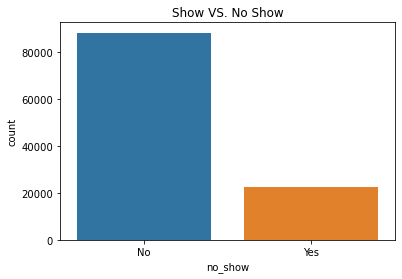

,patient_id
no_show,
No,88208
Yes,22319


In [158]:
#lets see how many missed there scheduled appointments ---conc(1)*

noshow_count = sns.countplot(x=df.no_show, data=df) 
noshow_count.set_title("Show VS. No Show")
plt.show();
pd.DataFrame(df.groupby(['no_show'])[['patient_id']].count())


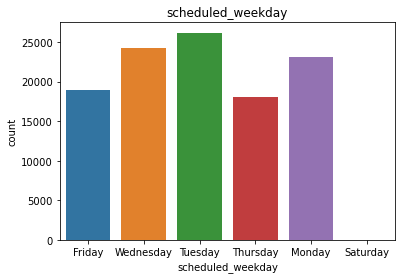

,patient_id
scheduled_weekday,
Friday,18915
Monday,23085
Saturday,24
Thursday,18073
Tuesday,26168
Wednesday,24262


In [159]:
#distribution of week day appointmnents ----- conc(5)
bar_chart_weekday= sns.countplot(x=df.scheduled_weekday, data=df)
bar_chart_weekday.set_title("scheduled_weekday")
plt.show();
pd.DataFrame(df.groupby(['scheduled_weekday'])[['patient_id']].count())

he visits along the week nearly equal with highest number of visits on Tuesday with 26168 visit and lowest visits number on   Saturday with 24 visits.

In [160]:
#age distribution in data set----- conc(6)
df['age'].describe()


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

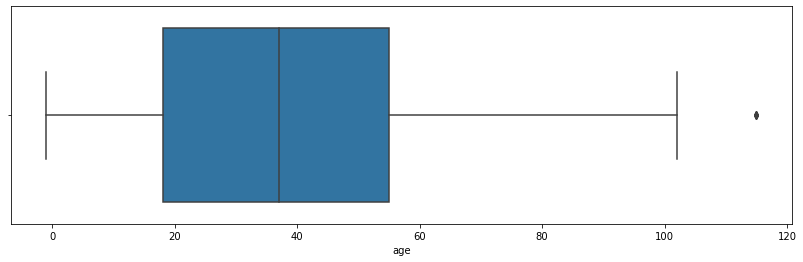

In [161]:
#further invistgation in age distribution ----- conc(6)
plt.figure(figsize=(14,4))
plt.xticks(rotation=0)
age_boxplot= sns.boxplot(x=df.age)

25%  of patients are 18 years old
50%  of patients are 37 years old
75%  of patients are 55 years old
and we have an outliner with a max age 115 years old

### Research Question 2  ( The Relation between Age ,No Show and  The Appointments number)

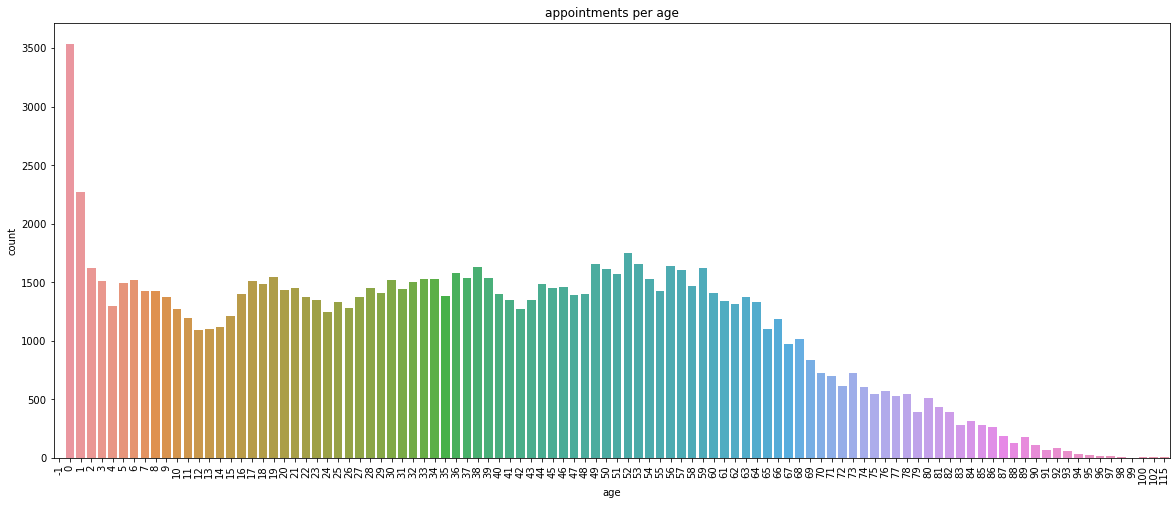

In [162]:
#lets see the relation between the age and the appointments number ----- conc(7)
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
appointments_per_age= sns.countplot(x=df.age)
appointments_per_age.set_title("appointments per age")
plt.show()
 


we have a peak at 0 which indicates there is alot of infants (newborn) who have appointments ,compared to the rest age             distribution ,rest of the patients age seems nearly equally distributed and start to decrease from 59 years old

,mean,std
no_show,,
No,37.790064,23.338878
Yes,34.317667,21.965941


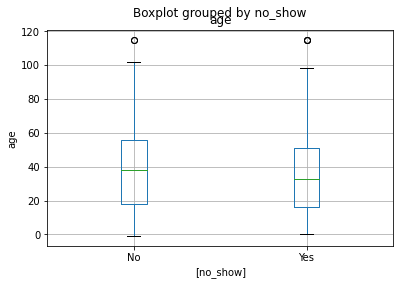

In [163]:
#relation between age and no show
df.boxplot(column=['age'],by=['no_show'],rot=0)
plt.ylabel('age')
pd.DataFrame(df.groupby(['no_show'])['age'].describe().loc[:,['mean','std']])

In [164]:
#quick gender analysis ---- conc(8)
pd.DataFrame(df.groupby(['gender'])[['patient_id']].count())

,patient_id
gender,
F,71840
M,38687


,patient_id
gender,
F,71840
M,38687


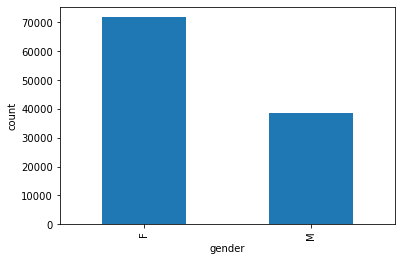

In [165]:
#gender count--- conc(8) 
df.groupby(['gender'])['patient_id'].count().plot(kind='bar').set_ylabel('count')
pd.DataFrame(df.groupby(['gender'])[['patient_id']].count())

### Research Question 3  ( The Relation between gender and no show)

In [166]:
#lets invistegate relation between gender and no show--- conc(8)
#first get the count of each gender
total_gender=df.shape[0]
total_male= len(df.loc[df['gender'] == "M"])
total_female= len(df.loc[df['gender'] == "F"])
percentage_male=int(round(total_male/total_gender * 100))
percentage_female=int(round(total_female/total_gender * 100))

#second we need who missed there appointments
missed_male=len(df.query('gender == "M" and no_show== "Yes"'))
missed_female=len(df.query('gender == "F" and no_show== "Yes"'))

#finally calculate the precentage of each gender
ratio_male=int(round(missed_male/total_male * 100))
ratio_female=ratio_male=int(round(missed_female/total_female * 100))
print("There is {}% Males and {}% Females".format(percentage_male,percentage_female))
 
print("There is {}% Males missed there appointments from total Males of : {}".format(ratio_male,total_male))
print("There is {}% Females missed there appointments from total Females of : {}".format(ratio_female,total_female))

There is 35% Males and 65% Females
There is 20% Males missed there appointments from total Males of : 38687
There is 20% Females missed there appointments from total Females of : 71840


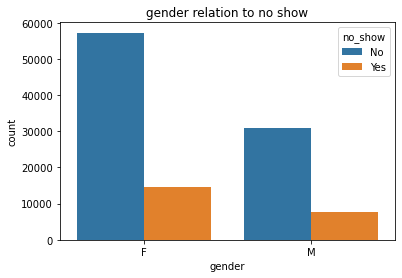

,no_show
gender,
F,71840
M,38687


In [167]:
#relation between gender and no show--- conc(8)
ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("gender relation to no show")
x_ticks_labels=['Female', 'Male']
plt.show();
pd.DataFrame(df.groupby(['gender'])[['no_show']].count())

### Research Question 4  (  Whats the range of most of the schedules)

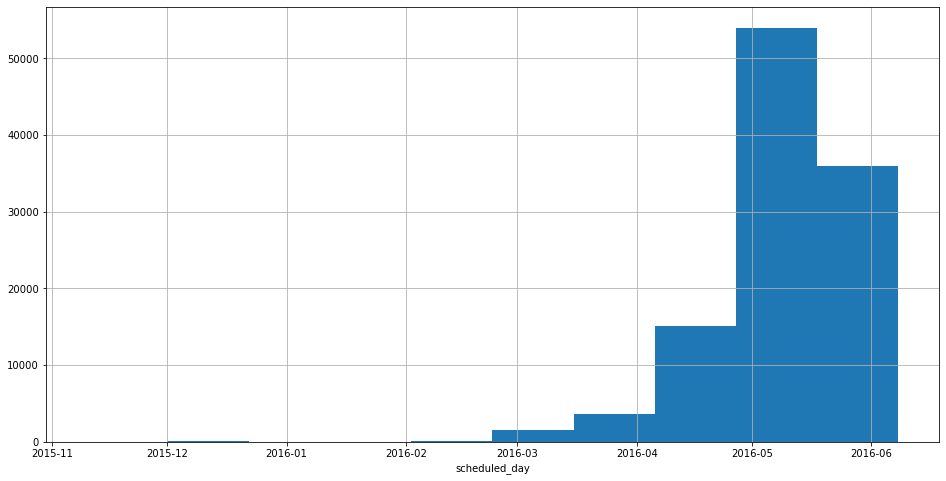

In [168]:
# whats the range of most of the schedules---- conc(9)
fig = plt.figure(figsize=(16, 8))
schedule_range = fig.add_subplot(1, 1, 1)
schedule_range.set_xlabel('scheduled_day')
df['scheduled_day'].hist();

Scheduled Appointments histrogram shows that : its left skewed ,which means scheduled appointment mostly made between march-   2016 and june-2016

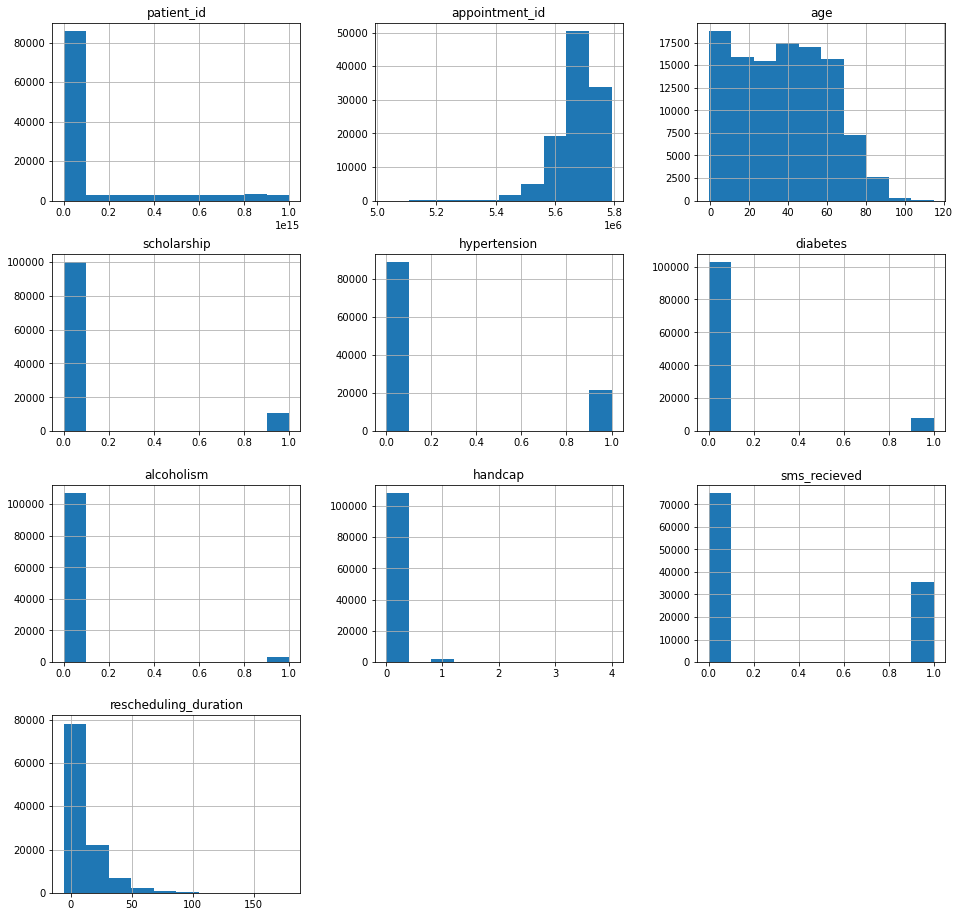

In [169]:
# Quick visualization for the raw data distribution -categorical type  ----- conc(10)
df.hist(figsize=(16,16));

### Research Question 5  (  which category affect show or no show to the appointmnet)

### Hypertension

no_show,No,Yes
hypertension,,
0,70179,18547
1,18029,3772


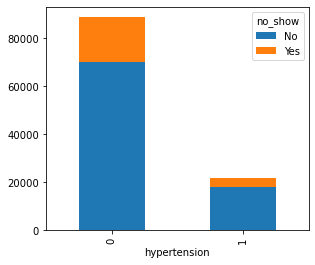

In [170]:
#investigate the no show ratio of hypertension
fig=plt.figure(figsize=(16,14))

graph= fig.add_subplot(3, 3, 1+i) 
df.groupby(['hypertension', 'no_show'])['hypertension'].count().unstack('no_show').plot(ax=graph, kind='bar', stacked=True)     
df.groupby(['hypertension', 'no_show'])['hypertension'].count().unstack('no_show') 


In [171]:
#investigate the no show ratio of hypertension
df['no_show_%'] = np.where(df['no_show']=='Yes', 1, 0)
df[['hypertension', 'no_show_%']].groupby(['hypertension'], as_index=False).mean().sort_values(by='no_show_%', ascending=False)

,hypertension,no_show_%
0,0,0.209037
1,1,0.173020


17% of patients who have hypertension did not showed to the appointment which is lower than average with 3% of no show , which is indicates  more care to the shceduled appointment from the first time

### Diabetes

no_show,No,Yes
diabetes,,
0,81695,20889
1,6513,1430


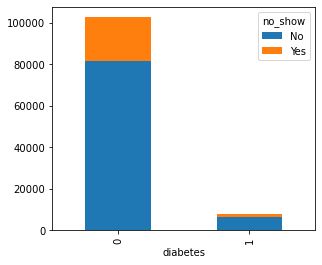

In [172]:
#investigate the no show ratio of diabetes
fig=plt.figure(figsize=(16,14))

graph= fig.add_subplot(3, 3, 1+i) 
df.groupby(['diabetes', 'no_show'])['diabetes'].count().unstack('no_show').plot(ax=graph, kind='bar', stacked=True)     
df.groupby(['diabetes', 'no_show'])['diabetes'].count().unstack('no_show') 


In [173]:
#investigate the no show ratio of diabetes
df[['diabetes', 'no_show_%']].groupby(['diabetes'], as_index=False).mean().sort_values(by='no_show_%', ascending=False)

,diabetes,no_show_%
0,0,0.203628
1,1,0.180033


18% of patients who have diabetes did not showed to the appointment which is lower than average with 2% of no show , which is indicates more care to the shceduled appointment from the first time

### Alcoholism

no_show,No,Yes
alcoholism,,
0,85525,21642
1,2683,677


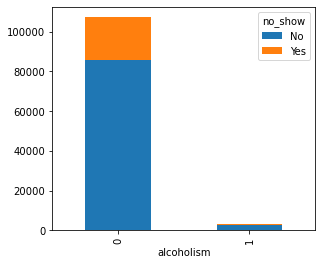

In [174]:
#investigate the no show ratio of alcoholism

fig=plt.figure(figsize=(16,14))

graph= fig.add_subplot(3, 3, 1+i) 
df.groupby(['alcoholism', 'no_show'])['alcoholism'].count().unstack('no_show').plot(ax=graph, kind='bar', stacked=True)     
df.groupby(['alcoholism', 'no_show'])['alcoholism'].count().unstack('no_show') 

In [175]:
#investigate the no show ratio of alcoholism
df[['alcoholism', 'no_show_%']].groupby(['alcoholism'], as_index=False).mean().sort_values(by='no_show_%', ascending=False)

,alcoholism,no_show_%
0,0,0.201946
1,1,0.201488


20% of patients who have alcoholism did not showed to the appointment which is the average of no show , which is indicates same  care to the shceduled appointment as the not alcoholic

### Handcap

no_show,No,Yes
handcap,,
0,86374,21912
1,1676,366
2,146,37
3,10,3
4,2,1


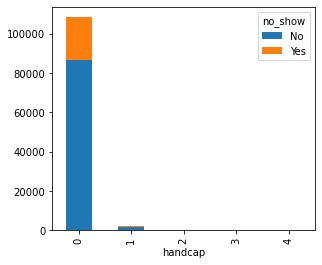

In [176]:
#investigate the no show ratio of handcap

fig=plt.figure(figsize=(16,14))

graph= fig.add_subplot(3, 3, 1+i) 
df.groupby(['handcap', 'no_show'])['handcap'].count().unstack('no_show').plot(ax=graph, kind='bar', stacked=True)     
df.groupby(['handcap', 'no_show'])['handcap'].count().unstack('no_show')

In [177]:
#investigate the no show ratio of handcap
df[['handcap', 'no_show_%']].groupby(['handcap'], as_index=False).mean().sort_values(by='no_show_%', ascending=False)

,handcap,no_show_%
4,4,0.333333
3,3,0.230769
0,0,0.202353
2,2,0.202186
1,1,0.179236


### SMS Recieved

no_show,No,Yes
sms_recieved,,
0,62510,12535
1,25698,9784


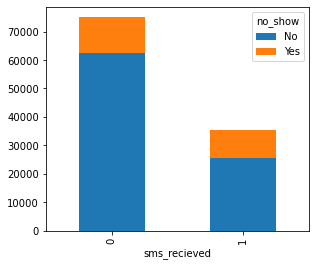

In [178]:
#investigate the no show ratio of sms_recieved

fig=plt.figure(figsize=(16,14))

graph= fig.add_subplot(3, 3, 1+i) 
df.groupby(['sms_recieved', 'no_show'])['sms_recieved'].count().unstack('no_show').plot(ax=graph, kind='bar', stacked=True)     
df.groupby(['sms_recieved', 'no_show'])['sms_recieved'].count().unstack('no_show')

In [179]:
#investigate the no show ratio of sms_recieved
df[['sms_recieved', 'no_show_%']].groupby(['sms_recieved'], as_index=False).mean().sort_values(by='no_show_%', ascending=False)

,sms_recieved,no_show_%
1,1,0.275745
0,0,0.167033


its surprising here to see 27% who have recieved sms didnt show up which above average with 7% , and only 16% who have not recieved sms did not show up which is below average with 4%

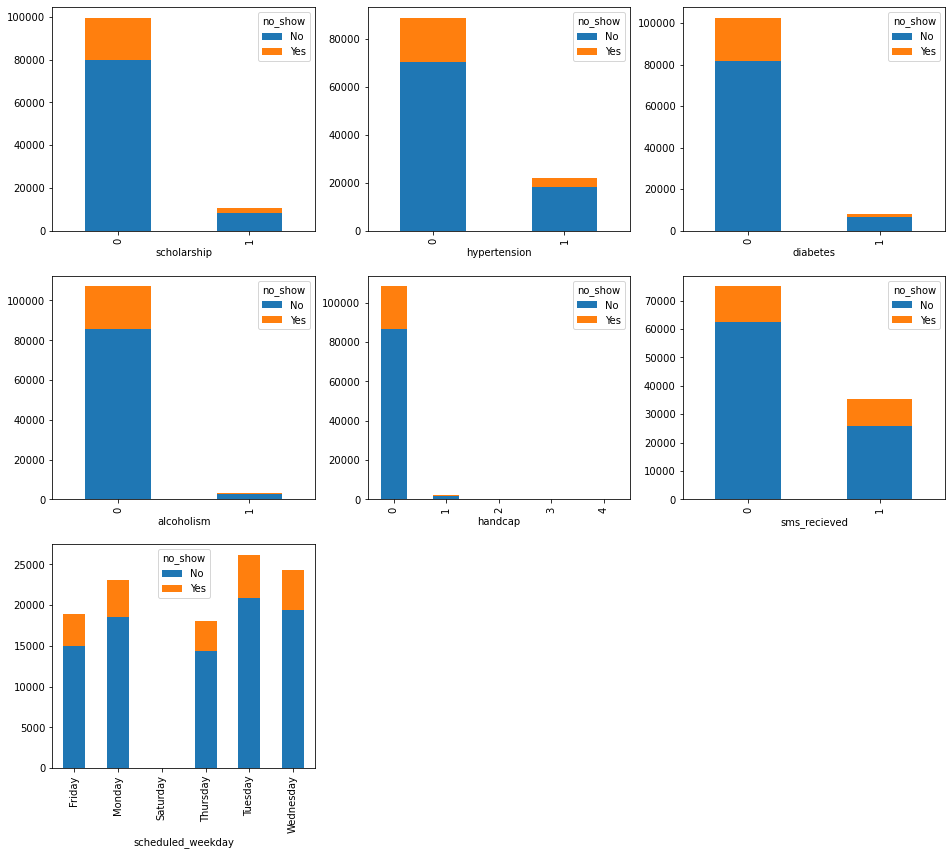

In [180]:
#sumarize investigation to know which category affect show or no show to the appointmnet----- conc(10)
variables=['scholarship','hypertension','diabetes','alcoholism','handcap','sms_recieved','scheduled_weekday']

fig=plt.figure(figsize=(16,14))
for i , variable in enumerate (variables):
    graph= fig.add_subplot(3, 3, 1+i)
    df.groupby([variable, 'no_show'])[variable].count().unstack('no_show').plot(ax=graph, kind='bar', stacked=True)
    

# Conclusions

- First i have discovered the data set and manage to rename some columns ,clean some data, add new columns which will help to     understand the dataset more, wrote some notes along the Exploratory Data Analysis , but as we go further we can see that we     need more information and data to get the prediction trend more accurate , we need to apply more advanced analysis.

After analysis we found the following:

- There are 88208 who showed for scheduled appointment and 22319 didnt show for there appointment which is 20% from the total appointments, there are 48228 patients who have been repeated in the dataset which indicates several visits for the same Patient.

- The visits along the week nearly equal with highest number of visits on Tuesday with 26168 visit and lowest visits number on   Saturday with 24 visits. 

- Found that First Scheduled visit on: 2015-11-10 ,Last Scheduled visit on: 2016-06-08.
- Also found that First rescheduled visit on: 2016-04-29 ,Last rescheduled visit on: 2016-06-08.
- Scheduled Appointments histrogram shows that : its left skewed ,which means scheduled appointment mostly made between march-   2016 and june-2016

- There are 38563 Patients who rescheduled for the same day,and 1792 Patients missed the rescheduled appointment for the same     day with 4.6%

- After rescheduling patients wait a duration on average 10 days , 25% of patients wait 0 day ,50%  of patients wait 4
  75% of patients wait 15 days , and max waiting duration reached 179 days
  
- Age distribution shows that : 25% of patients are years old ,50% of patients are 37 years old , 75% of patients are             55 years old ,and the oldest patient is 115 years old

- Appointments per Age shows that : there is alot of infants (newborn) who have appointments compared to the rest age             distribution ,rest of the patients age seems nearly equally distributed and start to decrease from 59 years old

- Gender analysis shows that :Female count is 71840 with 65%  ,and Male count is 38687 with 35% 

- Appointments per Gender : 38687 Appointments by Males which  20% of them missed there scheduled Appointments 
  and 71840 Appointments by Females which  20% of them missed there scheduled Appointments too
  
- 27% who have recieved sms didnt show up which above average with 7% , and only 16% who have not recieved sms did not show up which is below average with 4%

- Finally Categorical type of data as shown in the analysis such as: scholarship ,hypertension ,diabetes, alcoholism, handcap ,
  sms recieved , scheduled weekday are nearly the same with average no show precentage 20 % indicates no certain prediction       trend or key to the no show.



        
 




 
